In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cleaning

In [27]:
df = pd.read_csv("final_dataset.csv", index_col=0)

In [28]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Census Results,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


Get shape of the dataset

In [29]:
df.shape

(1051, 17)

Check if any NaN values in the dataset

In [30]:
df.isnull().values.any()

True

Get stats about df and convert to a csv 

In [31]:
stats_df = df.describe()
stats_df.to_csv("df_stats.csv")

Get datatypes of the df - can see land area is object but it should be int

In [32]:
df.dtypes 

Bedrooms            int64
Bathrooms         float64
Address            object
Land area          object
CV                  int64
Latitude          float64
Longitude         float64
SA1                 int64
0-19 years          int64
20-29 years         int64
30-39 years         int64
40-49 years         int64
50-59 years         int64
60+ years           int64
Suburbs            object
Census Results      int64
NZDep2018         float64
dtype: object

Function to make land into int and remove the "m2"

In [33]:
def remove_m2(string_val): #remove for land area
    space_loc = string_val.find("m")
    if space_loc == -1:
        sliced = string_val
    else:
        sliced = string_val[:space_loc-1]
        
    return int(sliced)

In [34]:
df['Land area'] = df['Land area'].apply(lambda x: remove_m2(x))

We can see Land area is now int

In [35]:
df.dtypes 

Bedrooms            int64
Bathrooms         float64
Address            object
Land area           int64
CV                  int64
Latitude          float64
Longitude         float64
SA1                 int64
0-19 years          int64
20-29 years         int64
30-39 years         int64
40-49 years         int64
50-59 years         int64
60+ years           int64
Suburbs            object
Census Results      int64
NZDep2018         float64
dtype: object

Check and see if 'Bathrooms' have null values

In [36]:
#Fill NaN Bathrooms with median value
df['Bathrooms'].isnull().values.any()

True

Make null values of bathrooms have the median value

In [37]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median()) #Bathrooms NaN with the mean/median value


Create a model to predict missing Suburb Value using the latitude, longitude and SA1 code

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X = df[['SA1', 'Latitude', 'Longitude']]
y = df.Suburbs

Split data into a train and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
def predict_suburb(sub, sa1, lat, lng):
    if pd.isna(sub):
        pred_suburb = model.predict([[sa1, lat, lng]])[0]
        return pred_suburb
    else:
        return sub

In [43]:
#Use model to predict the missing suburb based on SA1, Lat and Long
df['Suburbs'] = df.apply(lambda x: predict_suburb(x['Suburbs'], x['SA1'], x['Latitude'], x['Longitude']), axis=1)

No more missing values!

In [44]:
df.isnull().values.any()

False

Convert the CV to log

In [45]:
df['CV log'] = df['CV'].apply(lambda x: np.log(x))

In [46]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Census Results,NZDep2018,CV log
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0,13.774689
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0,14.038654
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0,14.038654
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,13.514405
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0,13.353475


Convert the dataset to a csv

In [47]:
df.to_csv("full_dataset.csv")

# Graphing

Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5a35192b0>,
      dtype=object)

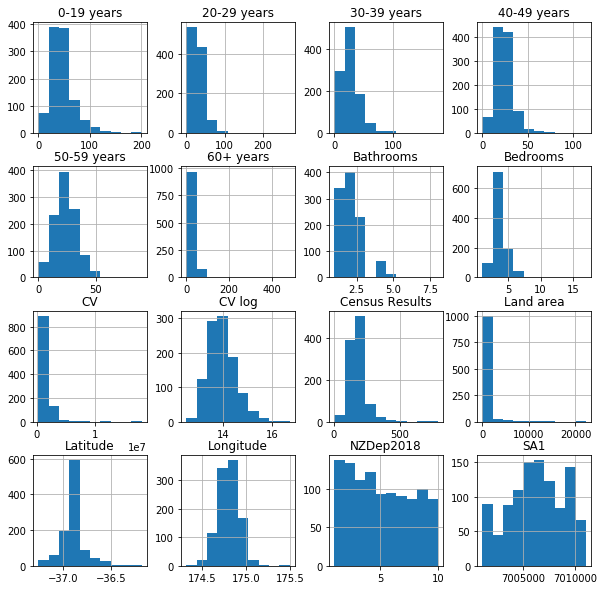

In [48]:
df.hist(figsize=(10,10))

Pairplots to see correlation between variables

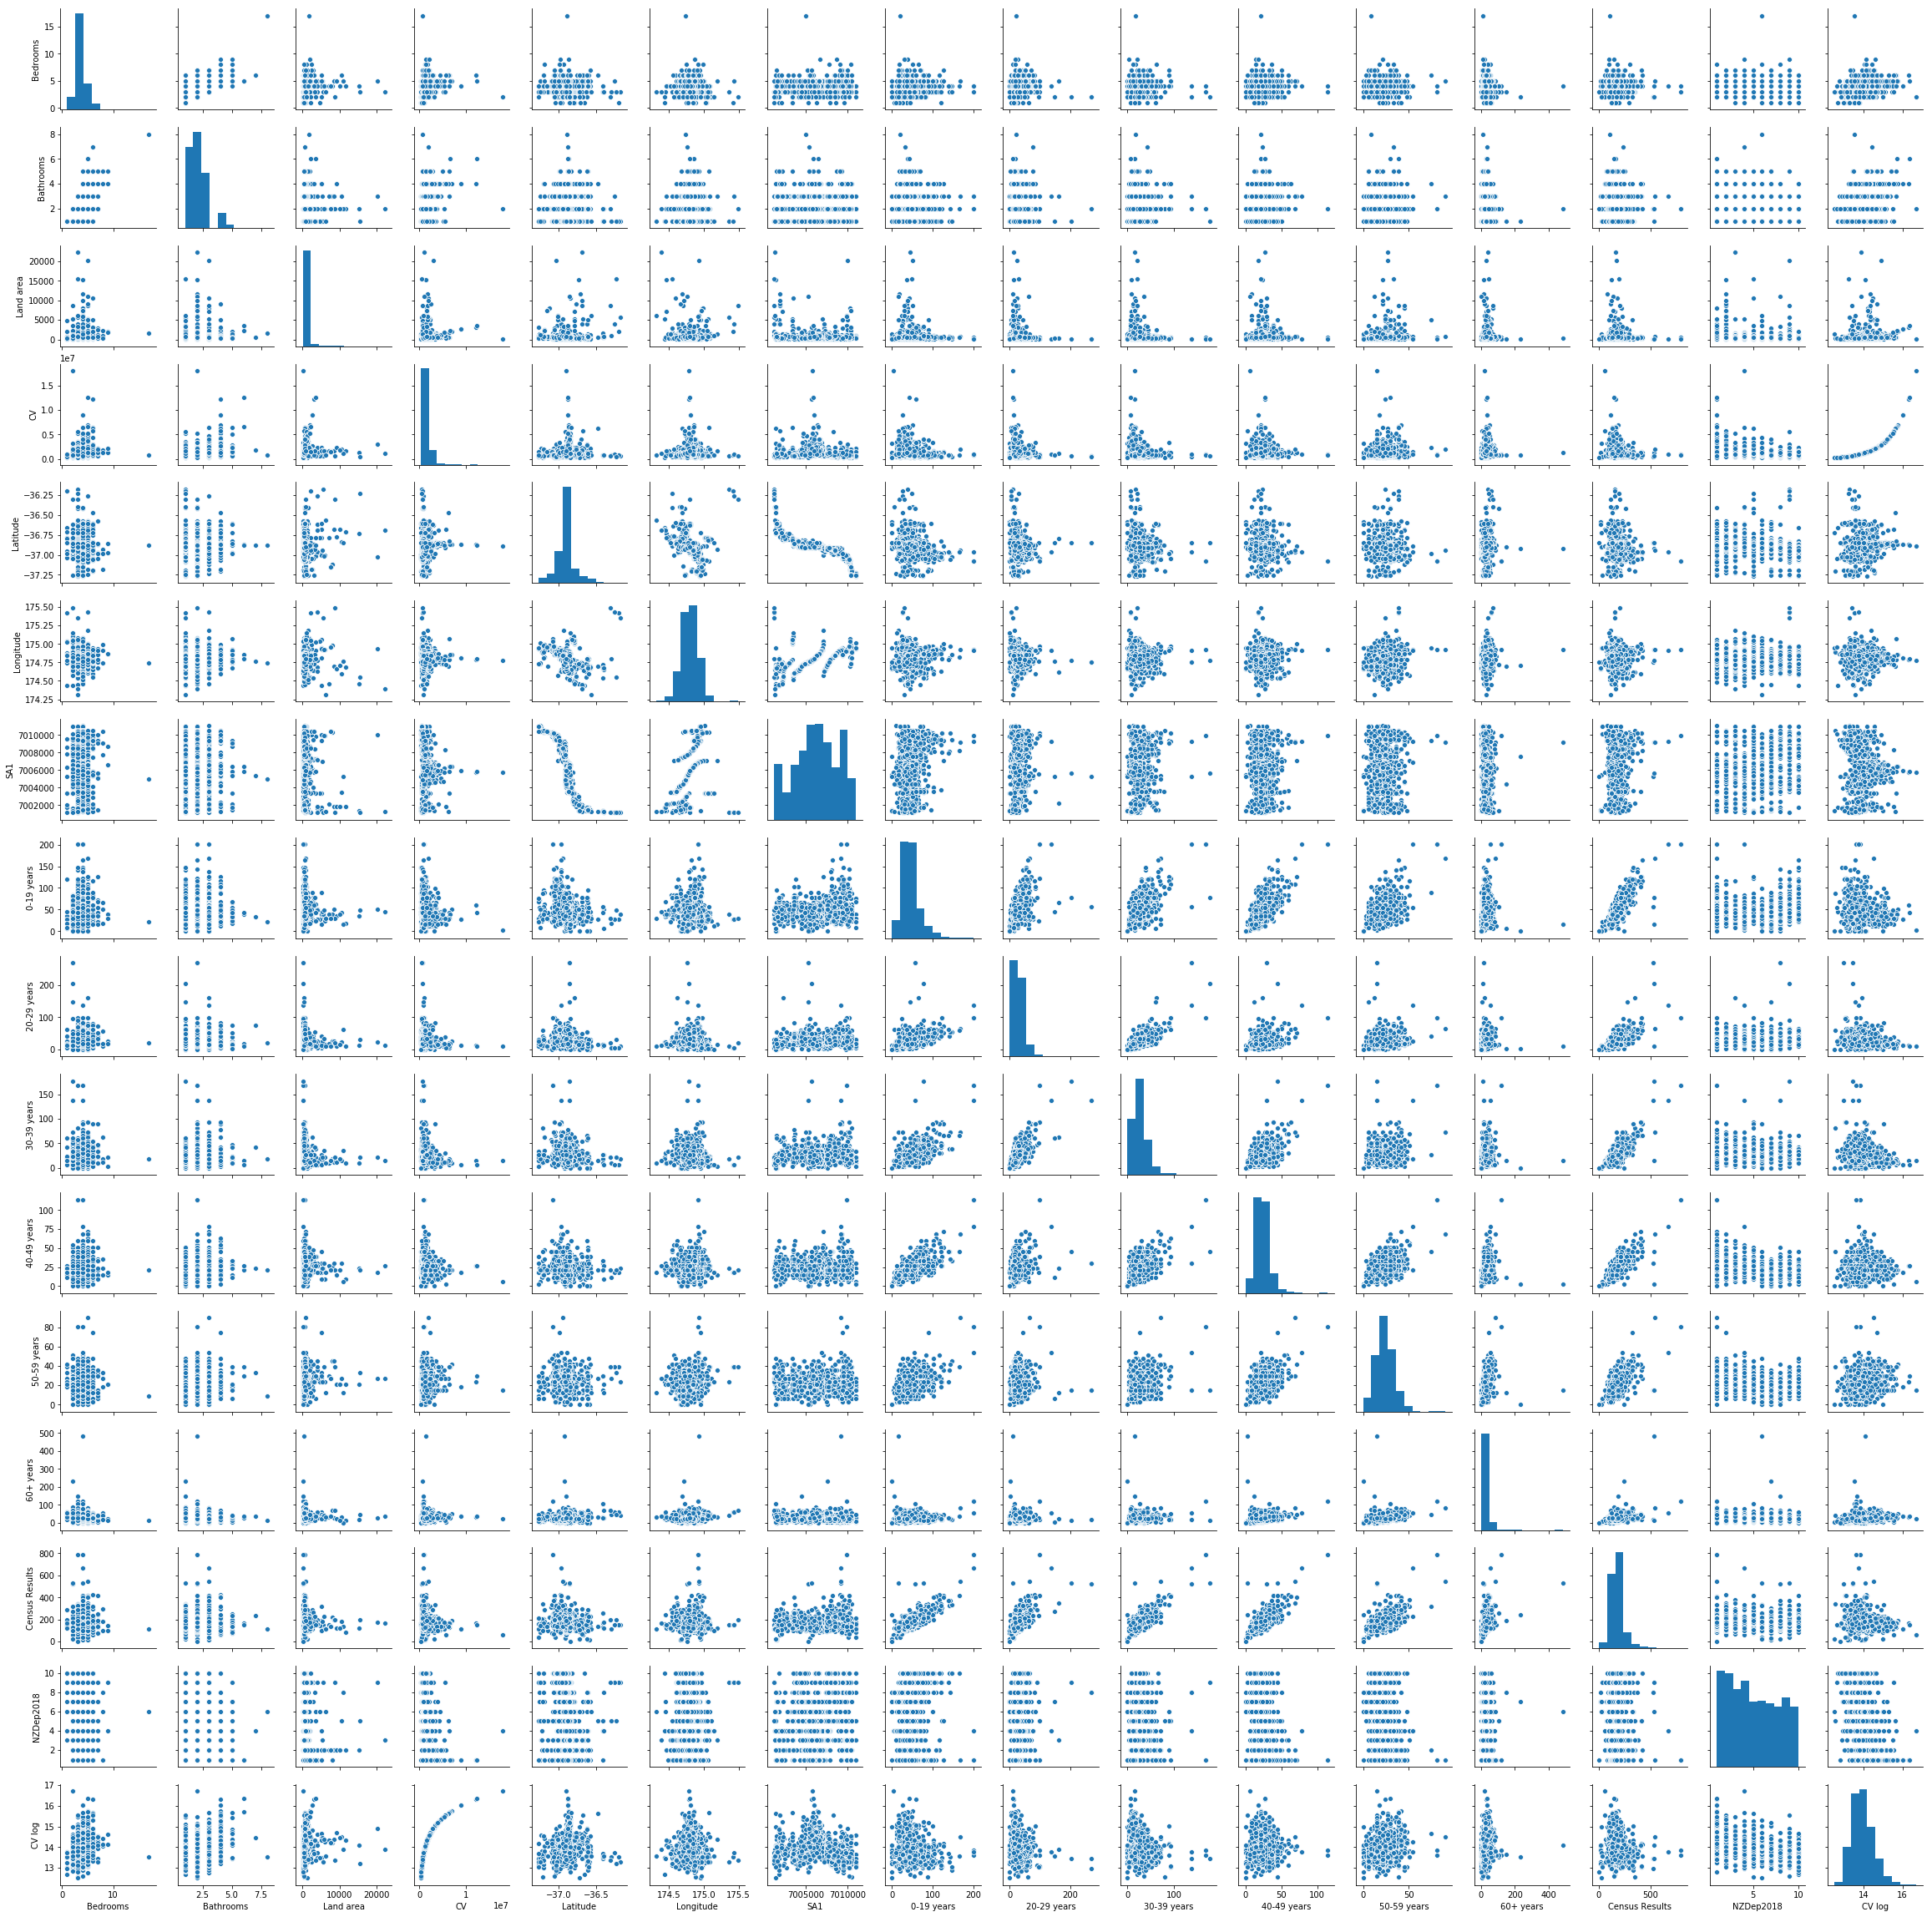

In [49]:
sns.pairplot(df, height = 2.0)

Correlation matrix

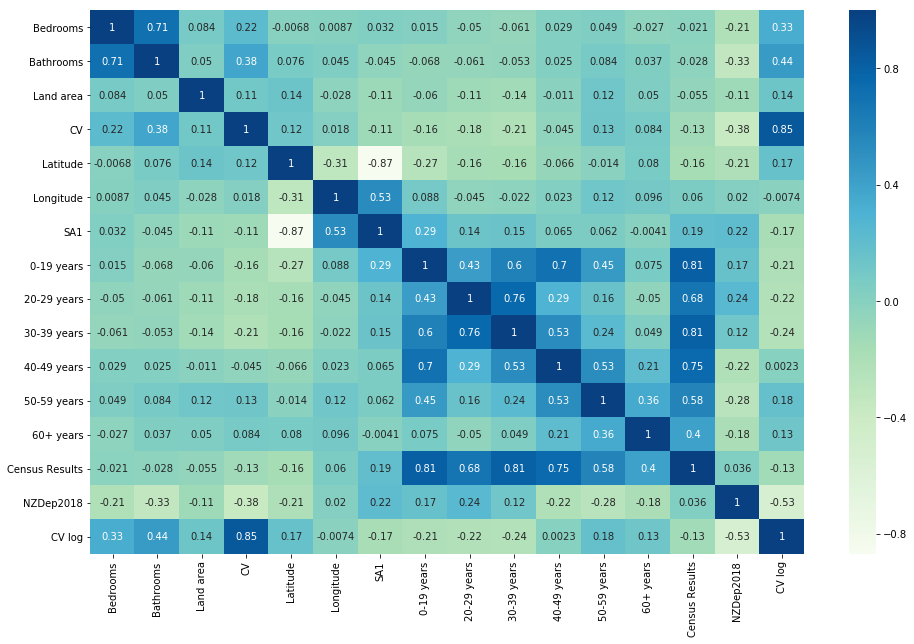

In [53]:
ax, fig = plt.subplots(figsize=(16,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="GnBu")
plt.show()

Distribution plot of land area

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


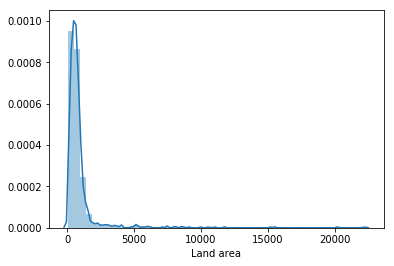

In [51]:
sns.distplot(df['Land area'])

Make a model which predicts the NZDep2018 based on numeric variables